In [73]:
#Libraries
import os
import shutil
import csv
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neurokit2 as nk
from tqdm import tqdm

#this is the general directory (change it to you own path)
gen_dir = "/Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/"

In [19]:
#intalling the necessary packages

#pip install tqdm
#pip install openpyxl

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [119]:
#This is for extracting all EDA.csv file in E4 folder
#List is saved in EDA_csv

# Set path to E4 data directory
e4_folder = os.path.join(gen_dir, "Data_ALL/ECSMP_dataset/E4")

# Set path to new directory for EDA files
new_folder = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files")

# create output directory if it doesn't exist
if not os.path.exists(new_folder):
    os.mkdir(new_folder)
    
# Loop through directories and move EDA files
for directory in tqdm(os.listdir(e4_folder)):
    if os.path.isdir(os.path.join(e4_folder, directory)):
        try:
            eda_path = os.path.join(e4_folder, directory, 'EDA.csv')
            if os.path.isfile(eda_path):
                new_filename = f"{directory}_eda.csv"
                new_path = os.path.join(new_folder, new_filename)
                shutil.copyfile(eda_path, new_path)
        except Exception as e:
            print(f"Error occurred while processing directory {directory}: {e}")

100%|██████████| 67/67 [00:04<00:00, 14.70it/s]


In [120]:
#deleting the first 2rows in each file

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files")
dest_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2")

# create output directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.mkdir(dest_directory)

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Read the data file
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    
    # Remove the first 2 rows
    data = data.iloc[2:]
    
    # Save the modified data to the destination directory
    pd.DataFrame(data).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 67/67 [00:04<00:00, 14.88it/s]


In [121]:
#couting the number of files processed
directory_eda = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2")

count = len(os.listdir(directory_eda))
print(f"There are {count} files in the {directory_eda} directory.")

There are 67 files in the /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2 directory.


In [122]:
#important code: DO NOT DELETE
#this code adding labels in the files

import os
import shutil

#defining the path to the input and output folders
data_path = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2")
output_path = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled")

#defining path for SDS_clean.xlsx
label_file_path = os.path.join(gen_dir, "Data_ALL/SDS_clean.xlsx")

#creating the new folder automatically
if not os.path.exists(output_path):
    os.makedirs(output_path)

#reading label files
df_labels = pd.read_excel(label_file_path)

#looping through CSV files and label them
for filename in tqdm(os.listdir(data_path)):
    if filename.endswith('.csv'):
        #getting ID from file name
        file_id = filename.split('_')[0]
        #file_id = file_id.zfill(3)
        
        #finding and matching label in the DataFrame
        label_row = df_labels.loc[df_labels['ID'] == int(file_id)]
        if len(label_row) == 1:
            label = label_row['Category'].values[0]
            #renaming the file with the label
            new_filename = f"{file_id}_eda_{label}.csv"
            #copying the file with the label and save it to the output directory
            csv_file_path = os.path.join(data_path, filename)
            output_file_path = os.path.join(output_path, new_filename)
            shutil.copy(csv_file_path, output_file_path)
            print(f"Labeled {filename} as {new_filename} and saved to {output_path}")


 43%|████▎     | 29/67 [00:00<00:00, 282.31it/s]

Labeled 001_eda.csv as 001_eda_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 002_eda.csv as 002_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 003_eda.csv as 003_eda_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 004_eda.csv as 004_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 005_eda.csv as 005_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 006_eda.csv as 006_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 00

100%|██████████| 67/67 [00:00<00:00, 288.02it/s]

Labeled 068_eda.csv as 068_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 070_eda.csv as 070_eda_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 072_eda.csv as 072_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 073_eda.csv as 073_eda_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 074_eda.csv as 074_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 075_eda.csv as 075_eda_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled
Labeled 07

In [123]:
#couting the number of files processed
directory_eda = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled")

count = len(os.listdir(directory_eda))
print(f"There are {count} files in the {directory_eda} directory.")

There are 66 files in the /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/EDA/EDA_csv_files2_labeled directory.


In [124]:
#extracting baseline6 and saving it to EDA_csv_files2_labeled_baseline6

#setting up directories
src_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled")
dest_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_baseline6")

#creating the new folder automatically
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

#defining constants
baseline_duration = 6 * 60  # 6 minutes
baseline_samples = 4 * baseline_duration  # 4 Hz sampling rate

#getting the list of files in source directory
files = [f for f in os.listdir(src_directory) if f.endswith(".csv")]

#looping through all files in source directory with progress bar
for filename in tqdm(files, desc="Extracting baseline 6 minutes"):
    #loading original file
    df = pd.read_csv(os.path.join(src_directory, filename))
    #extracting first 6 minutes of data
    df_baseline6 = df.iloc[:baseline_samples]
    #saving to new directory with same filename
    df_baseline6.to_csv(os.path.join(dest_directory, filename), index=False)


Extracting baseline 6 minutes: 100%|██████████| 66/66 [00:00<00:00, 66.67it/s]


In [125]:
import os
import pandas as pd
import neurokit2 as nk
from tqdm import tqdm

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_baseline6")
dest_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_baseline6_neurokit")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Load the data
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    
    # Apply the Pan-Tompkins algorithm for ECG cleaning
    cleaned_data = nk.eda_clean(data[0], sampling_rate=10, method="neurokit")
    
    # Save the cleaned data to the destination directory
    #cleaned_data.to_csv(os.path.join(dest_directory, filename), index=False, header=False)
    pd.DataFrame(cleaned_data).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 66/66 [00:00<00:00, 127.02it/s]


In [126]:
import os
import pandas as pd

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled")
dest_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_segment6")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Set up sampling rate and duration
sampling_rate = 4
duration = 6 * 60  # 6 minutes

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Read the data file
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    signal = data.values.flatten()
    
    # Extract the second 6 minutes of data
    start_sample = sampling_rate * 60 * 6  # starting sample index for the 6th minute
    end_sample = start_sample + (sampling_rate * duration)  # ending sample index for the 12th minute
    second_6_mins = signal[start_sample:end_sample]
    
    # Save the extracted data to the destination directory
    pd.DataFrame(second_6_mins).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 66/66 [00:00<00:00, 73.69it/s]


In [127]:
#filtering the segment6 files using pantompkins

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_segment6")
dest_directory = os.path.join(gen_dir, "Data_ALL/EDA/EDA_csv_files2_labeled_segment6_neurokit")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Load the data
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    
    # Apply the Pan-Tompkins algorithm for ECG cleaning
    cleaned_data = nk.ecg_clean(data[0], sampling_rate=10, method="neurokit")
    
    # Save the cleaned data to the destination directory
    #cleaned_data.to_csv(os.path.join(dest_directory, filename), index=False, header=False)
    pd.DataFrame(cleaned_data).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 66/66 [00:00<00:00, 99.22it/s] 


VISUALIZATION (Baseline6)

Text(0.5, 1.0, 'First 20 Seconds of Raw EDA signal')

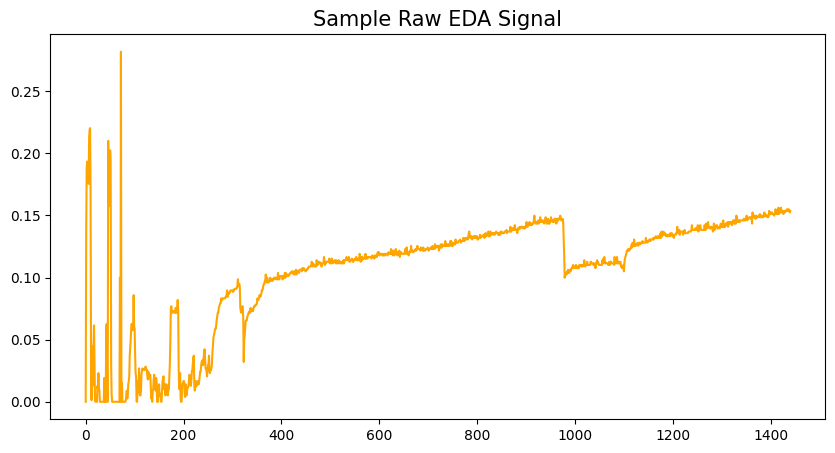

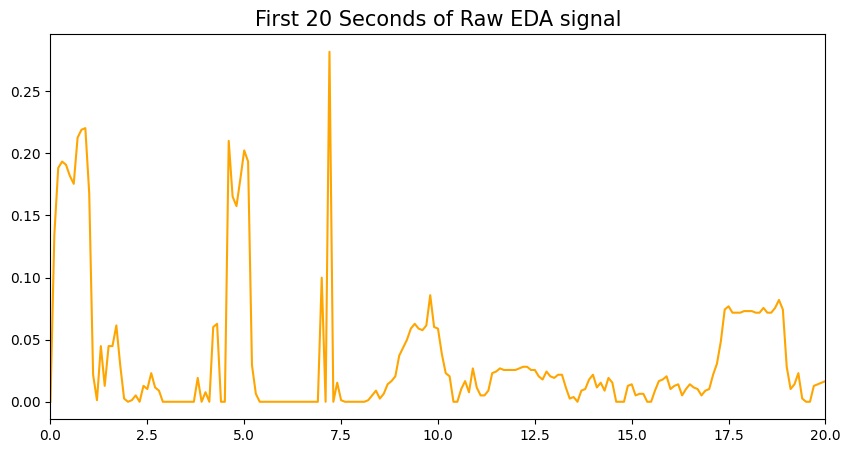

In [138]:
#sample raw eda signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/EDA/EDA_csv_files2_labeled_baseline6/002_eda_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 10
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Raw EDA Signal", fontsize=15)

# Plot first n seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 20)
plt.title("First 20 Seconds of Raw EDA signal", fontsize=15)


Text(0.5, 1.0, 'First 20 Seconds of Filtered ECG signal')

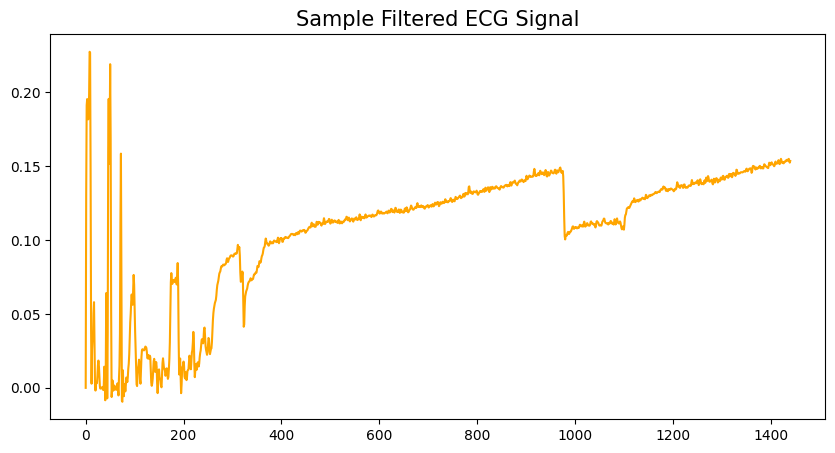

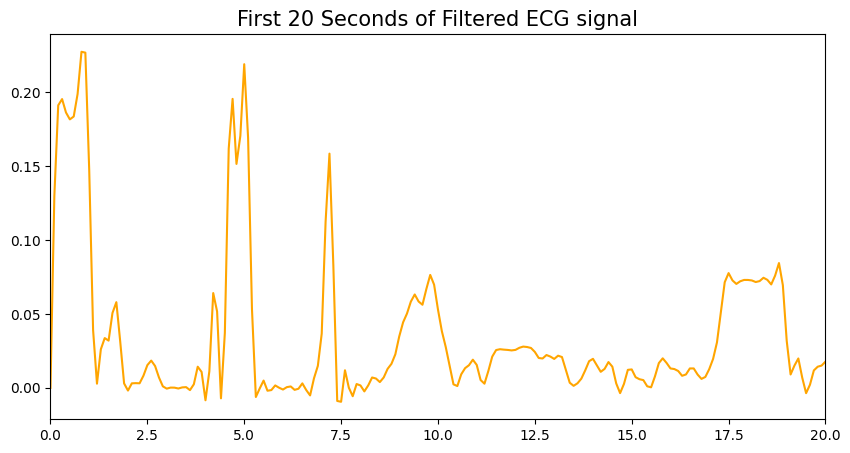

In [140]:
#sample filtered eda signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/EDA/EDA_csv_files2_labeled_baseline6_neurokit/002_eda_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 10
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Filtered ECG Signal", fontsize=15)

# Plot first n seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 20)
plt.title("First 20 Seconds of Filtered ECG signal", fontsize=15)


VISUALIZATION (Segment6)

Text(0.5, 1.0, 'First 20 Seconds of Raw EDA signal')

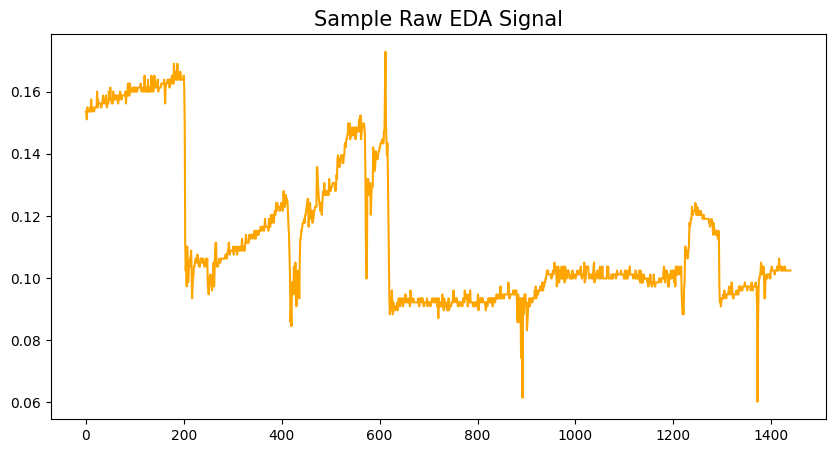

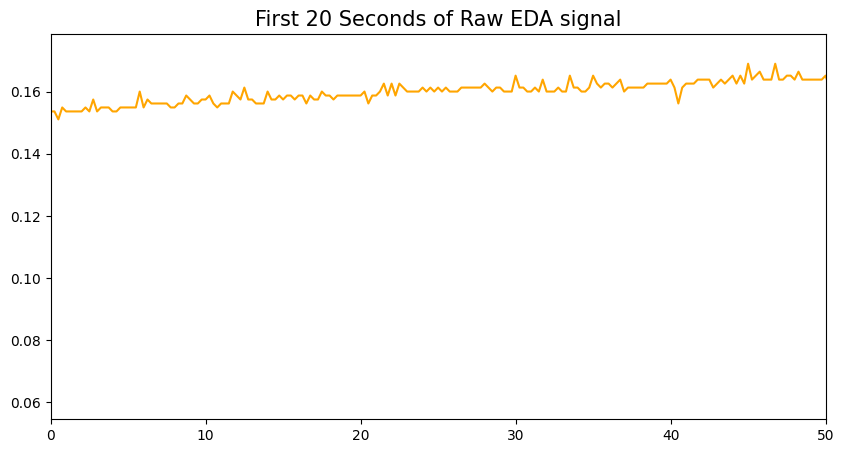

In [145]:
#sample raw eda signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/EDA/EDA_csv_files2_labeled_segment6/002_eda_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 4
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Raw EDA Signal", fontsize=15)

# Plot first n seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 50)
plt.title("First 20 Seconds of Raw EDA signal", fontsize=15)


Text(0.5, 1.0, 'First 20 Seconds of Filtered EDA signal')

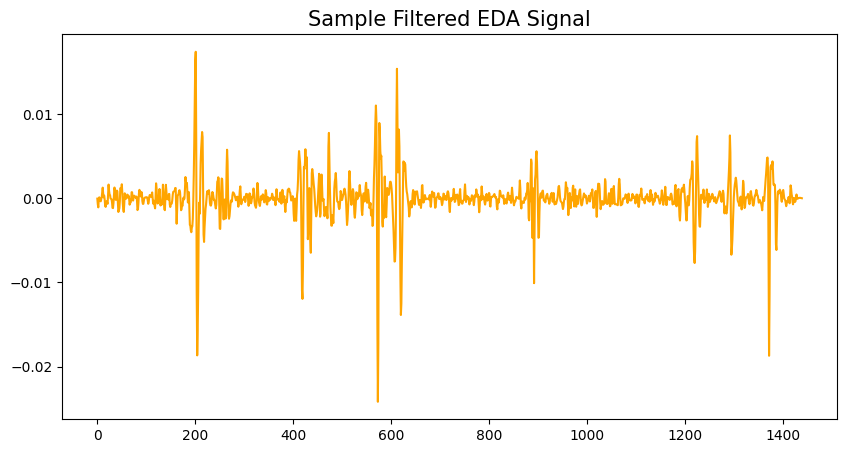

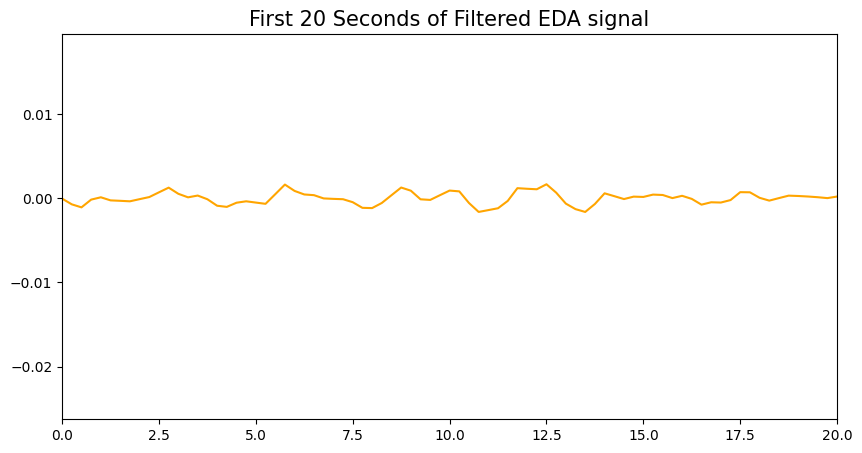

In [147]:
#sample filtered eda signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/EDA/EDA_csv_files2_labeled_segment6_neurokit/002_eda_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 4
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Filtered EDA Signal", fontsize=15)

# Plot first 20 seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 20)
plt.title("First 20 Seconds of Filtered EDA signal", fontsize=15)
